# Feature Engineering and Linear Regression to Predict Home Price

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Goal 
Create a linear regression model to predict the prices of homes in Melbourne. 

## Load Data

In [5]:
## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/')
df.head(5)

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan
2,Abbotsford,129 Charles St,2,h,941000.0,7/05/2016,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan
3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan
4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan


## Preprocess Data 

In [7]:
df1 = df.dropna(axis=0, how='any') # remove missing values 
df1 = df1.reset_index(drop=True)

## Feature Engineering 
- Adding a new column that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.
- Using the latitude / longitude of  (−37.841820,145.015986)
  for the center of Toorak.
- Assume the Earth is spherical and has radius of  6371.0088 km 

In [12]:
# Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula

toorak_pt = np.array([-37.841820, 145.015986])

def haversine_distance(pt1,pt2):
    r = 6371.0088
    lat1 = np.radians(pt1[0])
    lon1 = np.radians(pt1[1])
    lat2 = np.radians(pt2[0])
    lon2 = np.radians(pt2[1])
    
    dLat = (lat2-lat1) 
    dLon = (lon2-lon1) 
    
    term1 = (np.sin(dLat/2.0))**2
    term2 = np.cos(lat1)
    term3 = np.cos(lat2)
    term4 = (np.sin(dLon/2.0))**2
    
    dist = (2*r)*np.arcsin(np.sqrt(term1+term2*term3*term4))
    
    return dist

In [13]:
# Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
df2 = df1.copy()
df2['distance_to_toorak'] = haversine_distance(toorak_pt,[df2['Lattitude'], df2['Longtitude']])
df2.head(5)

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4.152012


## One Hot Encoding 
- Replace the 'Type' column with its one hot encoding 

In [14]:
dummy = pd.get_dummies(df2['Type'], prefix='Type')
removed = df2.drop(columns=['Type'])
df3 = pd.concat([dummy, removed], axis=1)
df3.head(5)

,Type_h,Type_t,Type_u,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,1,0,0,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4.261612
1,1,0,0,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4.621843
2,1,0,0,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4.374206
3,1,0,0,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4.780655
4,0,0,1,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4.152012


## Calculate the pairwise correlations between all of your numeric attributes

In [15]:
corrMatrix = df3.corr('pearson', numeric_only = True)
corrMatrix

,Type_h,Type_t,Type_u,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
Type_h,1.000000,-0.484749,-0.778062,0.501128,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221104
Type_t,-0.484749,1.000000,-0.172282,-0.040762,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014192
Type_u,-0.778062,-0.172282,1.000000,-0.535102,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238818
Rooms,0.501128,-0.040762,-0.535102,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844
Price,0.391761,-0.095295,-0.372766,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013
Postcode,-0.040504,-0.008546,0.051754,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062
Bedroom2,0.484612,-0.037366,-0.518941,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515
Bathroom,0.181773,0.108148,-0.282390,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662
Car,0.214175,-0.006836,-0.236298,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759
Landsize,0.047422,-0.067257,-0.005103,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420


## Linear Regression
- Create a model which predicts the price of a home based on numeric attributes. 

In [16]:
# build the matrix X
df3_numeric = df3.select_dtypes(np.number)
X = df3_numeric.drop(columns='Price', axis=1)
X = pd.concat([pd.DataFrame({'intercept': np.ones(3910)}), X], axis=1)

In [17]:
# build the column vector y
y = df3_numeric['Price']

In [18]:
# find beta hat per the formula 
beta_hat, residuals, rank, s = np.linalg.lstsq(X,y,rcond=None)

In [24]:
# Test the model to see if we get something reasonable
print("Predicted Price:", np.matmul(X.iloc[23],beta_hat))
print("Actual Price:", y[23])

Predicted Price: 668241.4294309434
Actual Price: 805000.0


## Apply the linear regression model to the test data and visualize the error
- Use the beta-hat calculated in the last step to predict the housing prices for data in melb_data_sold_test
- Create a visualization that shows the absolute error in predictions

In [25]:
# load the melb_data_sold_test.csv data for testing
# Use Imputation to fill in any missing numeric values
newDf = pd.read_csv('https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv')
newDf.fillna(method='ffill', inplace=True)

In [26]:
# add the new attribute for the 'distance_to_toorak' 
# and the one hot encoding to the new data frame
newDf1 = newDf.copy()
newDf1['distance_to_toorak'] = haversine_distance(toorak_pt,[newDf1['Lattitude'], newDf1['Longtitude']])
dummy = pd.get_dummies(newDf1['Type'], prefix='Type')
removed = newDf1.drop(columns=['Type'])
newDf1 = pd.concat([dummy, removed], axis=1)

In [27]:
# build the attribute matrix Xdot 
newDf1_numeric = newDf1.select_dtypes(np.number)
Xdot = newDf1_numeric.drop(columns='Price', axis=1)
Xdot = pd.concat([pd.DataFrame({'intercept': np.ones(1021)}), Xdot], axis=1)

In [29]:
# multiply Xdot by Beta hat
# This is a vector of predicted prices called y_hat
y_hat = np.matmul(Xdot,beta_hat) 

In [30]:
# calculate the error vector, |actual price - predicted price|
actualPrices = newDf1_numeric['Price']
absError = np.abs(actualPrices - y_hat)

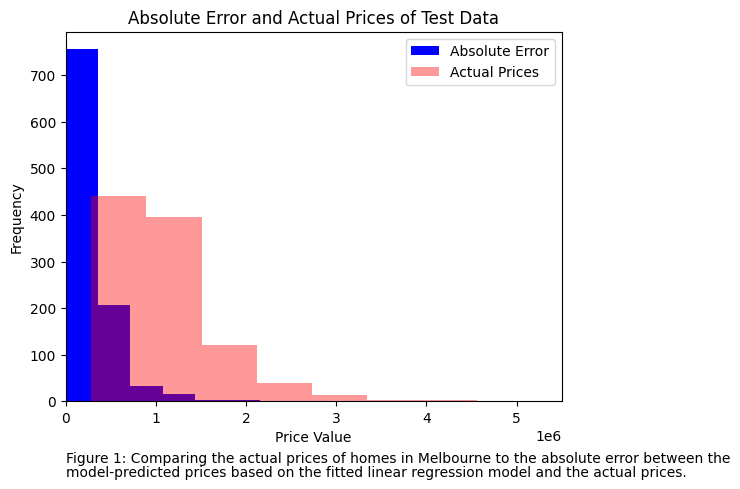

In [31]:
# create a histogram of the absolute error and 
# on the same plot, a histogram of the actual price  
plt.hist(absError, color='b', label='Absolute Error', bins=150)
plt.hist(actualPrices, color='r', label='Actual Prices', alpha=0.4)
plt.xlim(0,5500000)
plt.legend()
plt.xlabel('Price Value')
plt.ylabel('Frequency')
plt.title('Absolute Error and Actual Prices of Test Data')
plt.text(0, -130, 'Figure 1: Comparing the actual prices of homes in Melbourne to the absolute error between the')
plt.text(0, -160, 'model-predicted prices based on the fitted linear regression model and the actual prices.')
plt.show()

## Conclusion 
From the histogram, it is evident that this model predicts the prices of homes in Melbourne fairly well based on the fact that the majority of the absolute errors are less than $50,000.